In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/HR%20Analytics/turnover.csv")

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [5]:
df[["sales", 'salary']].describe().T

,count,unique,top,freq
sales,14999,10,sales,4140
salary,14999,3,low,7316


In [6]:
(df.salary.value_counts()/len(df.salary))*100

low       48.776585
medium    42.976198
high       8.247216
Name: salary, dtype: float64

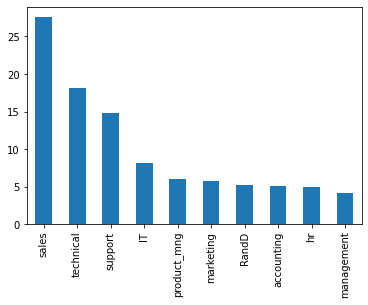

In [7]:
((df.sales.value_counts()/len(df.sales))*100).plot(kind='bar')

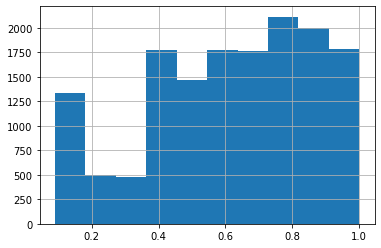

In [8]:
df.satisfaction_level.hist()

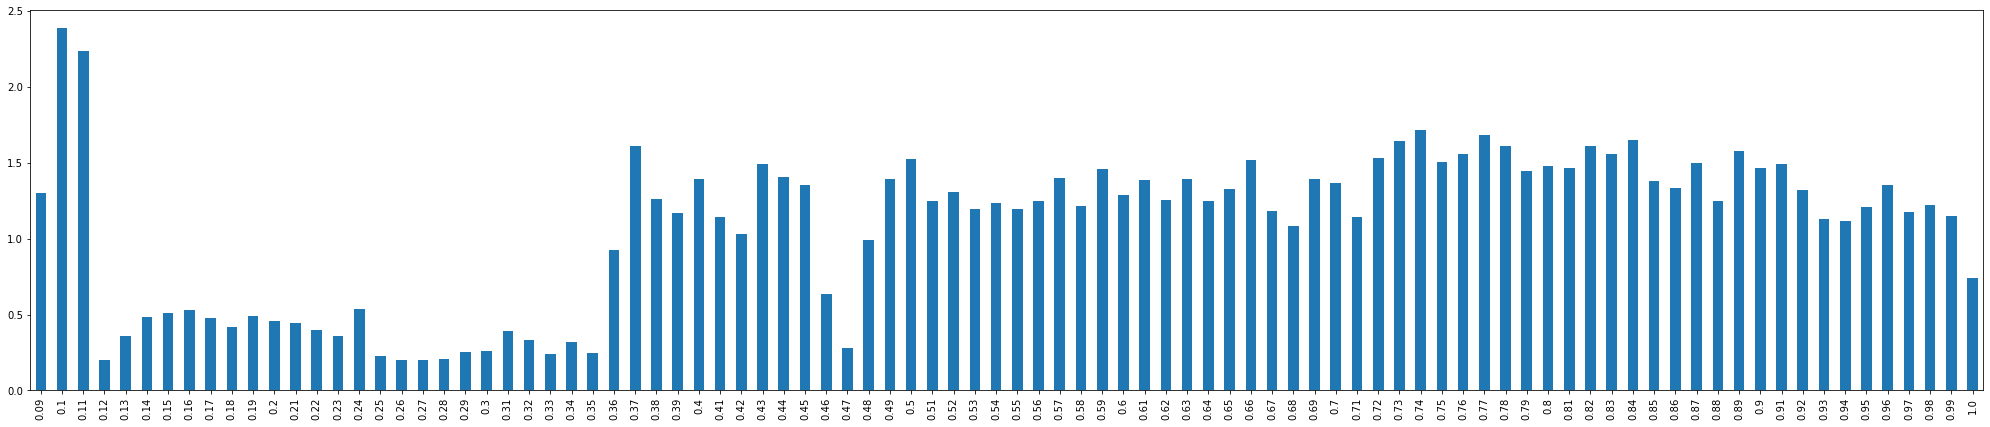

In [9]:
plt.figure(figsize=(35,7))
((df.satisfaction_level.value_counts().sort_index()/len(df.satisfaction_level))*100).plot(kind='bar')

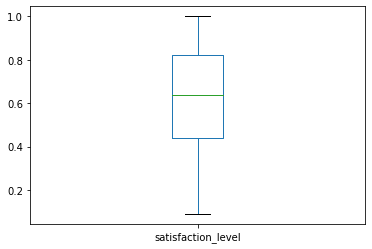

In [10]:
df.satisfaction_level.plot(kind='box')

In [11]:
df.left.value_counts()/len(df.left)

0    0.761917
1    0.238083
Name: left, dtype: float64

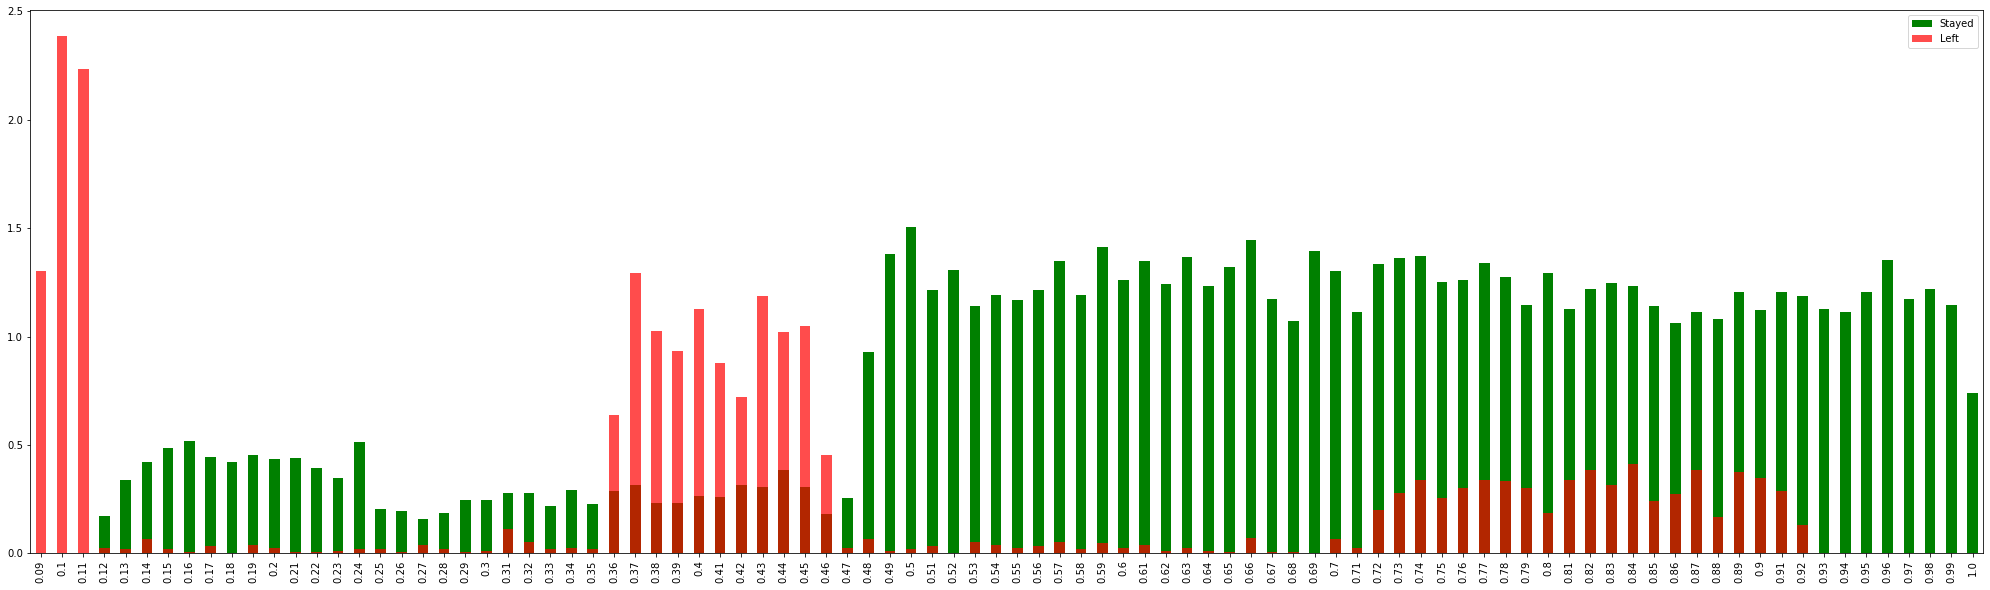

In [12]:
df.satisfaction_level = df.satisfaction_level.astype('category')
ax = pd.Series((df[df.left==0].satisfaction_level.value_counts()/len(df.left))*100).sort_index().plot(kind='bar',color='g',figsize=(35,10))
pd.Series((df[df.left==1].satisfaction_level.value_counts()/len(df.left))*100).sort_index().plot(kind='bar',color='r',alpha= 0.7,figsize=(35,10), ax=ax)
ax.legend(["Stayed", "Left"])

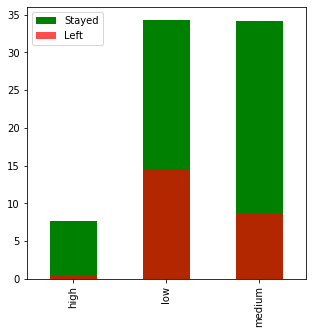

In [13]:
plt.figure(figsize=(5,5))
ax = ((df[df.left==0].salary.value_counts().sort_index()/len(df.left))*100).plot(kind='bar',color='g')
((df[df.left==1].salary.value_counts().sort_index()/len(df.left)*100)).plot(kind='bar',color='r',alpha= 0.7, ax= ax)
ax.legend(["Stayed", "Left"])

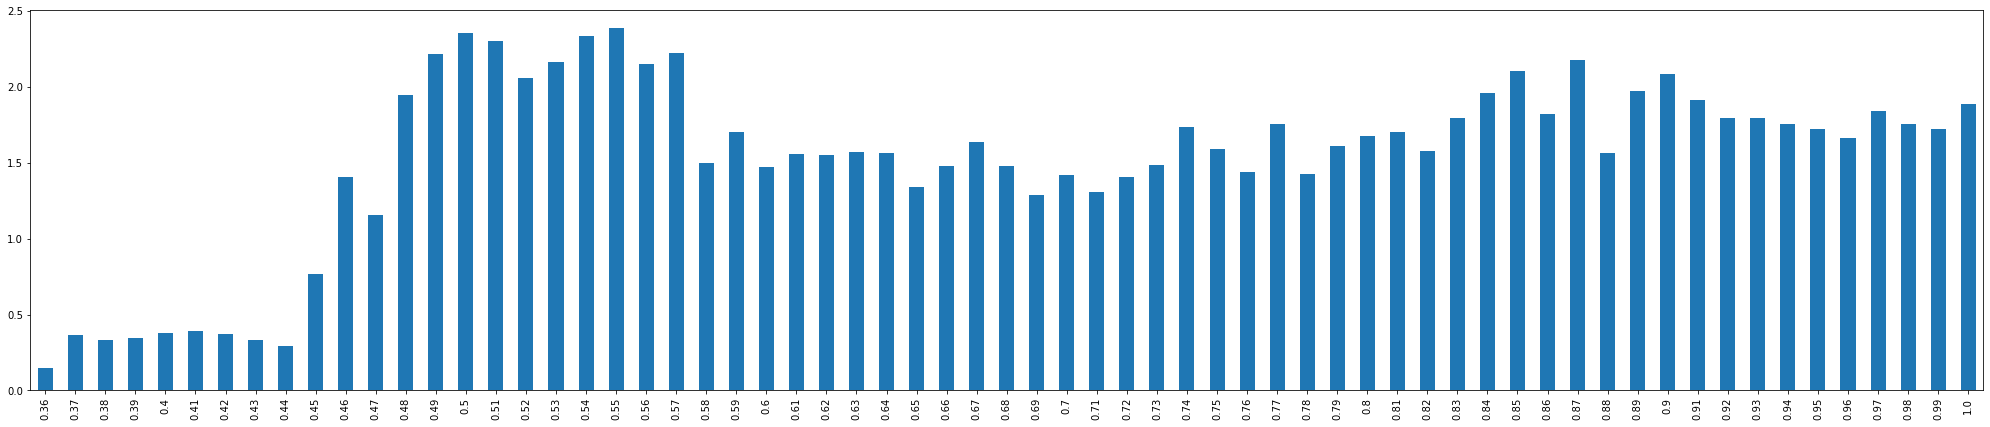

In [15]:
plt.figure(figsize=(35,7))
((df.last_evaluation.value_counts().sort_index()/len(df.last_evaluation))*100).plot(kind='bar')

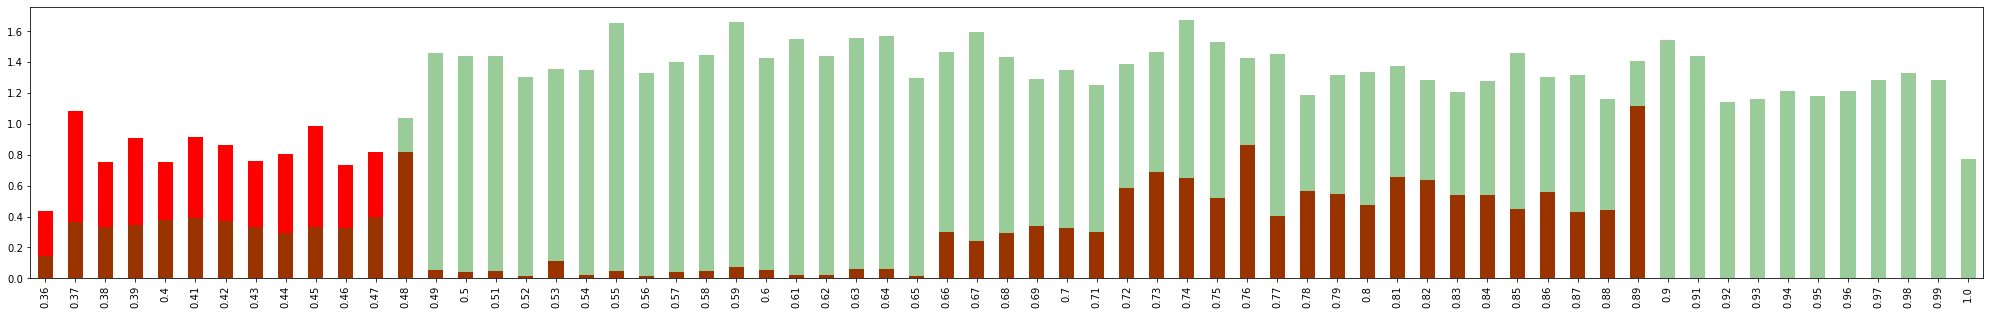

In [16]:
plt.figure(figsize=(35,5))
((df[df.left==1].last_evaluation.value_counts().sort_index()/len(df.left))*100).plot(kind='bar',color='r')
((df[df.left==0].last_evaluation.value_counts().sort_index()/len(df.left))*100).plot(kind='bar',color='g',alpha=0.4)

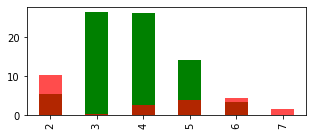

In [17]:
plt.figure(figsize=(5,2))
((df[df.left==0].number_project.value_counts().sort_index()/len(df.left))*100).plot(kind='bar',color='g')
((df[df.left==1].number_project.value_counts().sort_index()/len(df.left))*100).plot(kind='bar',color='r',alpha=0.7)

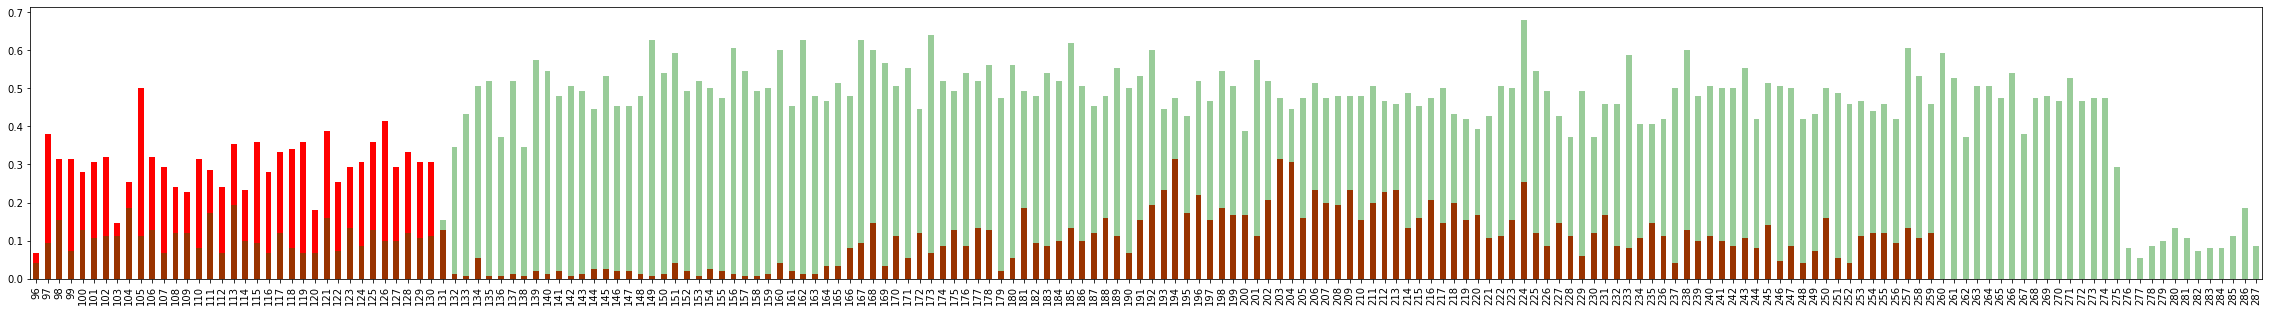

In [18]:
plt.figure(figsize=(40,5))
((df[df.left==1].average_montly_hours.value_counts().sort_index()/len(df.left))*100).plot(kind='bar',color='r')
((df[df.left==0].average_montly_hours.value_counts().sort_index()/len(df.left))*100).plot(kind='bar',color='g',alpha=0.4)

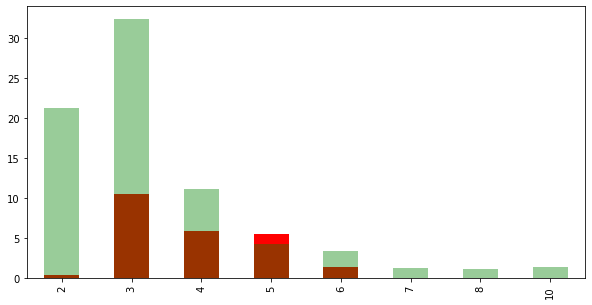

In [19]:
plt.figure(figsize=(10,5))
((df[df.left==1].time_spend_company.value_counts().sort_index()/len(df.left))*100).plot(kind='bar',color='r')
((df[df.left==0].time_spend_company.value_counts().sort_index()/len(df.left))*100).plot(kind='bar',color='g',alpha=0.4)

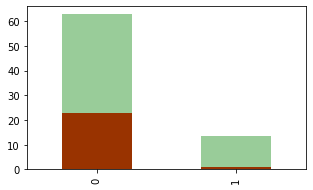

In [20]:
plt.figure(figsize=(5,3))
((df[df.left==1].Work_accident.value_counts().sort_index()/len(df.left))*100).plot(kind='bar',color='r')
((df[df.left==0].Work_accident.value_counts().sort_index()/len(df.left))*100).plot(kind='bar',color='g',alpha=0.4)

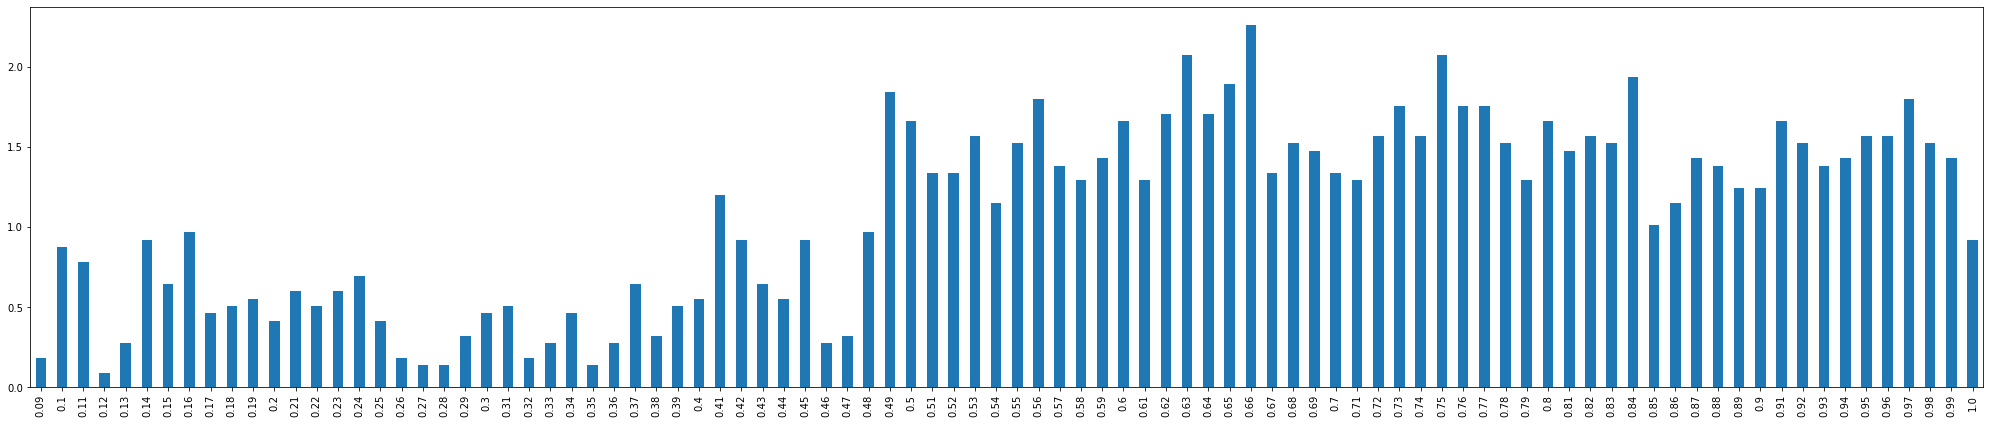

In [21]:
plt.figure(figsize=(35,7))
((df[df.Work_accident ==1].satisfaction_level.value_counts().sort_index()/len(df[df.Work_accident ==1]))*100).plot(kind='bar')

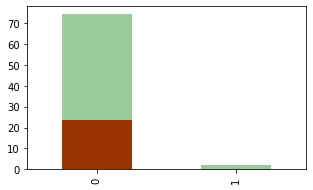

In [22]:
plt.figure(figsize=(5,3))
((df[df.left==1].promotion_last_5years.value_counts().sort_index()/len(df.left))*100).plot(kind='bar',color='r')
((df[df.left==0].promotion_last_5years.value_counts().sort_index()/len(df.left))*100).plot(kind='bar',color='g',alpha=0.4)

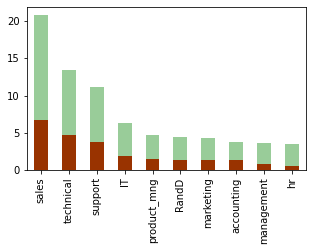

In [23]:
plt.figure(figsize=(5,3))
((df[df.left==1].sales.value_counts()/len(df.left))*100).plot(kind='bar',color='r')
((df[df.left==0].sales.value_counts()/len(df.left))*100).plot(kind='bar',color='g',alpha=0.4)

In [24]:
df = pd.concat([df, pd.get_dummies(df['sales'],prefix='sl', prefix_sep='_')], axis=1)
df.drop('sales', inplace=True, axis=1)
y = df.left.values
df.drop('left', inplace=True, axis=1)

In [25]:
df_NK = df.copy()

bins = [0, 0.11, 0.35, 0.46, 0.71, 0.92,1.0]
df_NK['satisfaction_level_bin'] = pd.cut(df_NK.satisfaction_level,bins)

bins = [0, 0.47, 0.48, 0.65, 0.88, 0.89,1.0]
df_NK['last_evaluation_bin'] = pd.cut(df_NK.last_evaluation,bins)

lkup = { 3: "low", 4 : "medium", 5 : "medium",  2: "high", 6: "high", 7: "Very high"}
df_NK['number_project_cat'] = df_NK['number_project'].map(lkup)

bins = [96, 131, 165, 178, 179, 259, 287]
df_NK['average_montly_hours_bin'] = pd.cut(df_NK.average_montly_hours,bins)

lkup = { 2: "low", 3 : "medium", 4 : "medium", 6 : "medium", 5: "high", 7: "very low", 8: "very low", 10: "very low"}
df_NK['time_spend_company_cat'] = df_NK['time_spend_company'].map(lkup)

df_NK = pd.concat([df_NK, pd.get_dummies(df_NK['satisfaction_level_bin'],prefix='sts', prefix_sep='_')], axis=1)
df_NK.drop('satisfaction_level', inplace=True, axis=1)
df_NK.drop('satisfaction_level_bin', inplace=True, axis=1)

df_NK = pd.concat([df_NK, pd.get_dummies(df_NK['last_evaluation_bin'],prefix='le', prefix_sep='_')], axis=1)
df_NK.drop('last_evaluation_bin', inplace=True, axis=1)
df_NK.drop('last_evaluation', inplace=True, axis=1)

df_NK = pd.concat([df_NK, pd.get_dummies(df_NK['number_project_cat'],prefix='np', prefix_sep='_')], axis=1)
df_NK.drop('number_project_cat', inplace=True, axis=1)
df_NK.drop('number_project', inplace=True, axis=1)

df_NK = pd.concat([df_NK, pd.get_dummies(df_NK['average_montly_hours_bin'],prefix='am', prefix_sep='_')], axis=1)
df_NK.drop('average_montly_hours_bin', inplace=True, axis=1)
df_NK.drop('average_montly_hours', inplace=True, axis=1)

df_NK = pd.concat([df_NK, pd.get_dummies(df_NK['time_spend_company_cat'],prefix='tsc', prefix_sep='_')], axis=1)
df_NK.drop('time_spend_company_cat', inplace=True, axis=1)
df_NK.drop('time_spend_company', inplace=True, axis=1)

df_NK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Work_accident          14999 non-null  int64 
 1   promotion_last_5years  14999 non-null  int64 
 2   salary                 14999 non-null  object
 3   sl_IT                  14999 non-null  uint8 
 4   sl_RandD               14999 non-null  uint8 
 5   sl_accounting          14999 non-null  uint8 
 6   sl_hr                  14999 non-null  uint8 
 7   sl_management          14999 non-null  uint8 
 8   sl_marketing           14999 non-null  uint8 
 9   sl_product_mng         14999 non-null  uint8 
 10  sl_sales               14999 non-null  uint8 
 11  sl_support             14999 non-null  uint8 
 12  sl_technical           14999 non-null  uint8 
 13  sts_(0.0, 0.11]        14999 non-null  uint8 
 14  sts_(0.11, 0.35]       14999 non-null  uint8 
 15  sts_(0.35, 0.46]   